In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('coffee shop sale.csv')






In [3]:
df.head(1)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg


In [4]:
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

In [5]:
total_revenue_store =  df.groupby('store_location').agg({'total_revenue':'sum'}
).reset_index().sort_values(by='total_revenue')
total_revenue_store


,store_location,total_revenue
1,Hell's Kitchen,48.65
0,Astoria,69.05
2,Lower Manhattan,91.00


In [6]:
total_revenue = df['total_revenue'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $208.70


In [7]:
total_unique_transaction = df['transaction_id'].nunique()
print(f"Total unique transactions: {total_unique_transaction}")


Total unique transactions: 50


In [8]:
total_quantity_sold = df['transaction_qty'].sum()
print(f"Total quantity sold: {total_quantity_sold}")

Total quantity sold: 69


In [9]:
df.head(1)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_revenue
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0


In [10]:
average_unit_price = df['unit_price'].mean()
print(f"Average unit price: ${average_unit_price:.2f}")

Average unit price: $3.02


In [20]:
sale_by_store = df.groupby('store_location').agg(
    total_sales = ('total_revenue','sum')
    ).reset_index().sort_values(by='total_sales',ascending=False)
sale_by_store = sale_by_store.set_index('store_location')

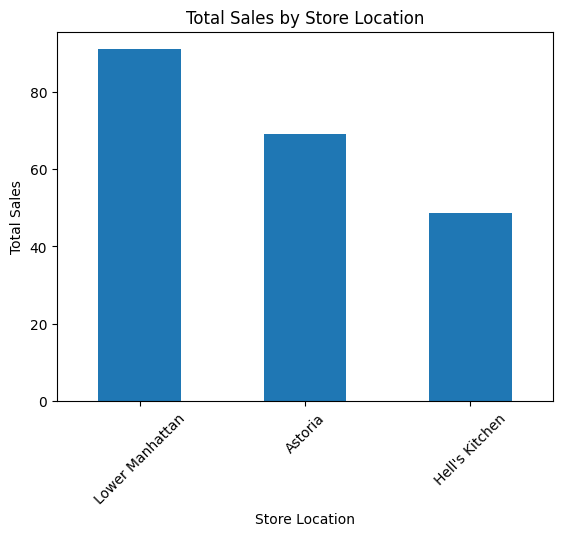

In [23]:
sale_by_store.plot(kind='bar')
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Location')
plt.legend().set_visible(False)
plt.xticks(rotation=45)
plt.show()

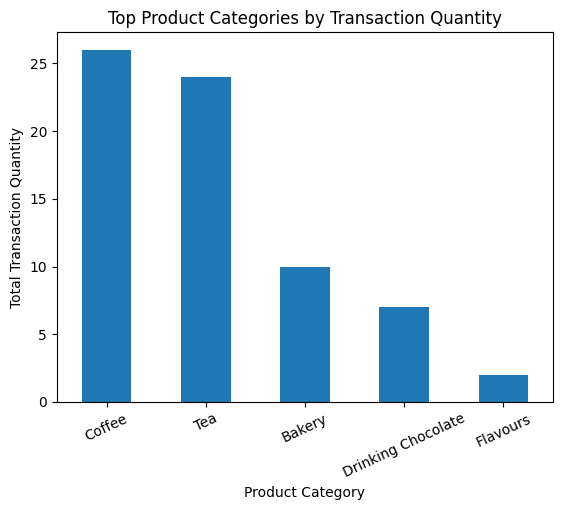

In [30]:
top_product = df.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False)

top_product.plot(kind='bar')
plt.xticks(rotation=25)
plt.xlabel('Product Category')
plt.ylabel('Total Transaction Quantity')
plt.title('Top Product Categories by Transaction Quantity')
plt.show()




In [34]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

df['hour'] = df['transaction_time'].dt.hour

df.head(1)


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_revenue,hour
0,1,2023-01-01,2026-01-16 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,7


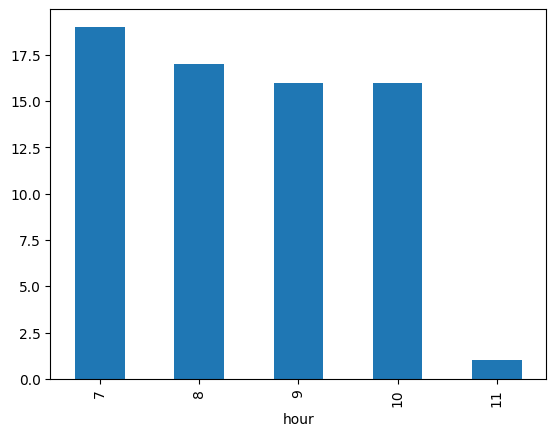

In [40]:
bussiest_hour = df.groupby('hour')['transaction_qty'].sum()

bussiest_hour.plot(kind='bar')
plt.show()
